<a href="https://colab.research.google.com/github/Ahmed-Shatla/Exploratory-data-analysis-project/blob/main/The-Sparks-Foundation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Import libraries and load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/sparks/globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

#2) Check for missing values

In [5]:
data.isnull().sum().sum()

13853997

In [6]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
data = data[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','specificity','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]
#rename columns
data.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'extended':'Extended',
                     'country_txt':'Country',
                     'region_txt':'Region',
                     'city':'City',
                     'success':'Success',
                     'specificity':'Specificity',
                     'suicide':'Suicide',
                     'attacktype1_txt':'Attack_Type',
                     'targtype1_txt':'Target_Type',
                     'gname':'Attack_group_name',
                     'weaptype1_txt':'Weapon',
                     'nkill':'Number_of_kills'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Specificity,Suicide,Attack_Type,Target_Type,Attack_group_name,Weapon,Number_of_kills
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,1.0,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,1.0,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,4.0,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,1.0,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,1.0,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [10]:
data.isna().sum()

Year                     0
Month                    0
Day                      0
Extended                 0
Country                  0
Region                   0
City                   434
Success                  0
Specificity              6
Suicide                  0
Attack_Type              0
Target_Type              0
Attack_group_name        0
Weapon                   0
Number_of_kills      10313
dtype: int64

In [11]:
data.shape

(181691, 15)

#3) Visualizing the missing values

Text(0.5, 1.0, 'Visualized Nulls')

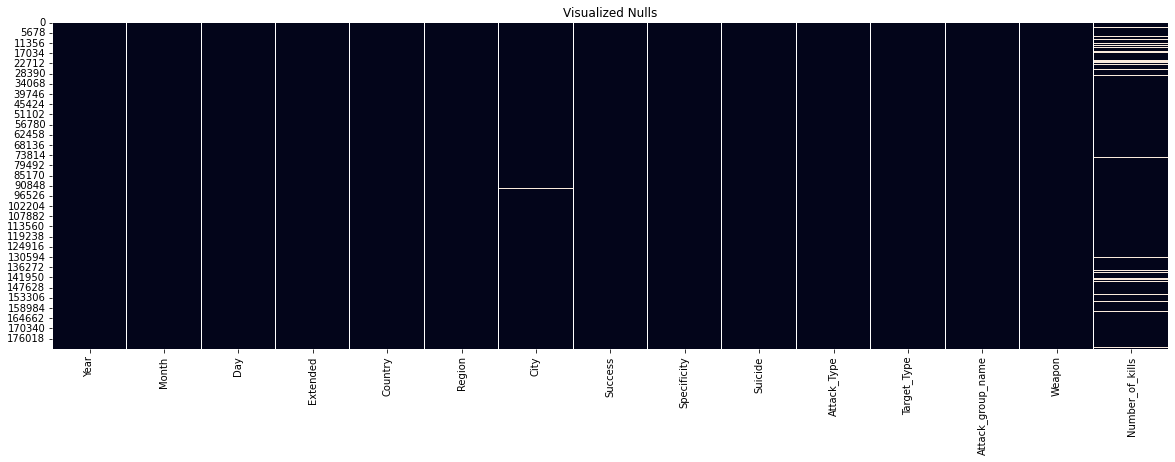

In [12]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(data.isna(),cbar=False)
plt.title('Visualized Nulls')

#4) Replacing the missing values

In [13]:
data['City'] = data['City'].dropna()
data['Number_of_kills'].fillna(data['Number_of_kills'].values.mean,inplace=True)
data['Specificity'].fillna(0,inplace=True)

In [14]:
data.isna().sum().sum()

434

#5) Visualization

